#3. Linear Ridge Regression in Multiple Dimension

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape

(1338, 7)

##1. Feature Normalization:

In [4]:
#Coverting categorical data into numeric data

data['sex'].replace(data['sex'].unique(), [0,1], inplace=True)
data['smoker'].replace(data['smoker'].unique(), [1,0], inplace=True)
data['region'].replace(data['region'].unique(), [0,1,2,3], inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [5]:
#Normalizing the data

for column in data.columns:
    if column != 'charges':
        data[column] = (data[column] - data[column].mean())/data[column].std()
data

,age,sex,bmi,children,smoker,region,charges
0,-1.438227,-1.010141,-0.453151,-0.908274,1.969850,-1.343402,16884.92400
1,-1.509401,0.989221,0.509431,-0.078738,-0.507273,-0.438331,1725.55230
2,-0.797655,0.989221,0.383164,1.580335,-0.507273,-0.438331,4449.46200
3,-0.441782,0.989221,-1.305043,-0.908274,-0.507273,0.466741,21984.47061
4,-0.512957,0.989221,-0.292447,-0.908274,-0.507273,0.466741,3866.85520
...,...,...,...,...,...,...,...
1333,0.768185,0.989221,0.050278,1.580335,-0.507273,0.466741,10600.54830
1334,-1.509401,-1.010141,0.206062,-0.908274,-0.507273,1.371813,2205.98080
1335,-1.509401,-1.010141,1.014499,-0.908274,-0.507273,-0.438331,1629.83350
1336,-1.295877,-1.010141,-0.797515,-0.908274,-0.507273,-1.343402,2007.94500


In [6]:
for column in data.columns:
    print(column,": ",data[column].mean(), data[column].std())

age :  -1.81054307902249e-16 0.999999999999997
sex :  -1.941645648447583e-16 1.0000000000000184
bmi :  1.5532750306031851e-15 0.9999999999999998
children :  -2.5407346049344016e-16 0.9999999999999994
smoker :  -1.9084551245424962e-17 1.0000000000000067
region :  -2.398015352142528e-17 0.9999999999999882
charges :  13270.422265141257 12110.011236693994


##2. K-Fold CV

In [7]:
def partition(data):
    data_train = data.sample(frac=0.8)
    data_test = data.drop(data_train.index)
    return data_train, data_test

In [8]:
data_train, data_test = partition(data)

len(data_train)/(len(data))

0.7997010463378177

In [9]:
def K_Fold_data(data, fold):
    n = int(len(data)/fold)
    X_k_fold = []

    i = 0
    while i<fold:
        if i ==(fold-1):
            X_k_fold.append(data.iloc[n*i:, :])
            break
        X_k_fold.append(data.iloc[n*i:n*(i+1), :])

        i += 1
    return X_k_fold

In [10]:
def train_validation(data_k_fold, test_fold):
    data_validation = data_k_fold[test_fold]
    idx = [i for i in range(10)]
    idx.remove(test_fold)

    data_train = data_k_fold[idx[0]]
    idx.remove(idx[0])
    for i in idx:
        data_train = np.concatenate((data_train, data_k_fold[i]), axis=0)
    return data_train, data_validation

In [11]:
temp = K_Fold_data(data_train,10)
len(data_train) 
for df in temp:
    print(len(df))

107
107
107
107
107
107
107
107
107
107


In [12]:
def ridge_reg(X, y, alpha):  # inv(X'*X + A)*(X'y)

    A = alpha*np.identity(X.shape[1])
    A[0,0] = 0

    X_trans = np.transpose(X)

    temp = np.linalg.inv(np.matmul(X_trans, X) + A)

    w_optimal = np.matmul(np.matmul(temp,X_trans), y)

    return w_optimal

In [13]:
data.iloc[:,:-1], data.iloc[:,-1]

(           age       sex       bmi  children    smoker    region
 0    -1.438227 -1.010141 -0.453151 -0.908274  1.969850 -1.343402
 1    -1.509401  0.989221  0.509431 -0.078738 -0.507273 -0.438331
 2    -0.797655  0.989221  0.383164  1.580335 -0.507273 -0.438331
 3    -0.441782  0.989221 -1.305043 -0.908274 -0.507273  0.466741
 4    -0.512957  0.989221 -0.292447 -0.908274 -0.507273  0.466741
 ...        ...       ...       ...       ...       ...       ...
 1333  0.768185  0.989221  0.050278  1.580335 -0.507273  0.466741
 1334 -1.509401 -1.010141  0.206062 -0.908274 -0.507273  1.371813
 1335 -1.509401 -1.010141  1.014499 -0.908274 -0.507273 -0.438331
 1336 -1.295877 -1.010141 -0.797515 -0.908274 -0.507273 -1.343402
 1337  1.551106 -1.010141 -0.261290 -0.908274  1.969850  0.466741
 
 [1338 rows x 6 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     162

In [14]:
data.iloc[:,:-1].to_numpy(), data.iloc[:,:-1].to_numpy().shape

(array([[-1.4382265 , -1.010141  , -0.45315057, -0.90827406,  1.9698501 ,
         -1.34340229],
        [-1.50940108,  0.98922092,  0.50943062, -0.07873775, -0.50727343,
         -0.43833066],
        [-0.7976553 ,  0.98922092,  0.38316358,  1.58033487, -0.50727343,
         -0.43833066],
        ...,
        [-1.50940108, -1.010141  ,  1.01449877, -0.90827406, -0.50727343,
         -0.43833066],
        [-1.29587735, -1.010141  , -0.79751522, -0.90827406, -0.50727343,
         -1.34340229],
        [ 1.55110577, -1.010141  , -0.26129026, -0.90827406,  1.9698501 ,
          0.46674098]]), (1338, 6))

In [15]:
def reg_value(x, w_optimal):
    return np.matmul(x, w_optimal)

In [16]:
def mse_error(X,y,w_optimal):
    error = 0
    n = len(y)
    for i in range(n):
        X[i] = X[i].reshape(1, len(X[i]))
        error += (np.matmul(X[i], w_optimal) - y[i])**2
    return (error/n)

In [17]:
data_k_fold = K_Fold_data(data_train,10)
data_k_fold = np.array(data_k_fold)

In [18]:
data_k_fold.shape, type(data_k_fold)

((10, 107, 7), numpy.ndarray)

In [19]:
def modify_data(data):
    n = len(data)
    X = np.ones(n)
    X = X.reshape(n,1)
    X = np.c_[X, data]
    return X

In [20]:
data_train.shape, data_test.shape, data_k_fold.shape

((1070, 7), (268, 7), (10, 107, 7))

In [21]:
modify_data(data_train).shape, type(modify_data(data_train))

((1070, 8), numpy.ndarray)

**All functions:**


1.   **def partition(data):** return data_train, data_test
2.   **def K_Fold_data(data, fold):** return X_k_fold
3.   **def train_validation(data_k_fold, test_fold):** return data_train, data_validation
4.   **def ridge_reg(X, y, alpha):** return w_optimal
5.   **def mse_error(X,y,w_optimal):** (error/n)**0.5
6.   def modify_data(data):



In [22]:
def var_matrix(value_matrix):
    avg_col = np.mean(value_matrix, axis=1)
    avg_col = avg_col.reshape(value_matrix.shape[0], 1)

    temp = value_matrix - avg_col
  
    sum_col = np.mean(np.square(temp), axis=1)
    
    return np.mean(sum_col)

In [23]:
data_train, data_test, data_k_fold

data_train_org = modify_data(data_train)

y_axis = []
x_axis = []
var = []

value_matrix = np.array([[0]*10]*len(data_train_org))

alpha = 0
while(alpha <= 400):
    error = 0
    for i in range(10):
        data_train, data_validation = train_validation(data_k_fold, i)

        data_train = modify_data(data_train)
        data_validation = modify_data(data_validation)

        data_train_X = data_train[:,:-1]
        data_train_y = data_train[:,-1]

        data_validation_X = data_validation[:,:-1]
        data_validation_y = data_validation[:,-1]

        w_optimal = ridge_reg(data_train_X, data_train_y, alpha)

        w_optimal = w_optimal.reshape(len(w_optimal), 1)
        error += mse_error(data_validation_X, data_validation_y, w_optimal)

#        for j in range(len(data_train_org)):
#            value_matrix[j][i] = np.matmul(data_train_org[], w_optimal)
        lol = np.matmul(data_train_org[:,:-1], w_optimal)
        value_matrix[:, i] = lol.reshape(lol.shape[0],)

    var.append(var_matrix(value_matrix))
    y_axis.append(error[0]/10)
    x_axis.append(alpha)
    alpha += 8

In [24]:
data_train_org

array([[ 1.00000000e+00, -1.43822650e+00, -1.01014100e+00, ...,
        -5.07273429e-01, -1.34340229e+00,  2.91356900e+03],
       [ 1.00000000e+00, -1.43822650e+00, -1.01014100e+00, ...,
        -5.07273429e-01,  4.66740978e-01,  2.11733885e+03],
       [ 1.00000000e+00, -1.36705193e+00, -1.01014100e+00, ...,
        -5.07273429e-01, -1.34340229e+00,  1.88048700e+03],
       ...,
       [ 1.00000000e+00,  9.81709145e-01, -1.01014100e+00, ...,
        -5.07273429e-01,  4.66740978e-01,  1.03556410e+04],
       [ 1.00000000e+00,  2.69963365e-01,  9.89220923e-01, ...,
        -5.07273429e-01, -1.34340229e+00,  6.25043500e+03],
       [ 1.00000000e+00, -1.08235362e+00,  9.89220923e-01, ...,
         1.96985010e+00, -4.38330657e-01,  3.81262465e+04]])

In [25]:
data_train_org.shape

(1070, 8)

In [26]:
lol = np.matmul(data_train_org[:,:-1], w_optimal)

lol = lol.reshape(lol.shape[0],).shape

In [27]:
len(y_axis)

51

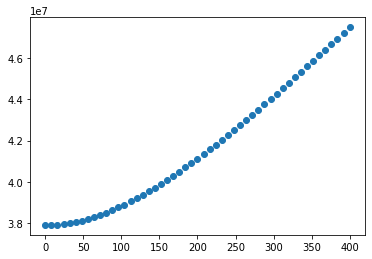

In [28]:
plt.scatter(x_axis, y_axis)

In [29]:
data_test.shape, type(data_test), data_train.shape, type(data_train)

((268, 7), pandas.core.frame.DataFrame, (963, 8), numpy.ndarray)

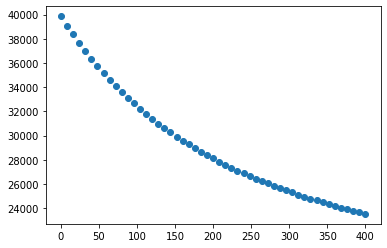

In [30]:
plt.scatter(x_axis, var)

In [31]:
train_error = []
test_error = []

lamd = []
alpha = 0

#data_train = modify_data(data_train.to_numpy())
data_test = modify_data(data_test.to_numpy())

while(alpha <= 400):

    error_train = 0
    error_test = 0

    data_train_X = data_train[:,:-1]
    data_train_y = data_train[:,-1]

    data_test_X = data_test[:,:-1]
    data_test_y = data_test[:,-1]

    w_optimal = ridge_reg(data_train_X, data_train_y, alpha)

    w_optimal = w_optimal.reshape(len(w_optimal), 1)

    error_train += mse_error(data_train_X, data_train_y, w_optimal)
    error_test += mse_error(data_test_X, data_test_y, w_optimal)

    train_error.append(error_train)
    test_error.append(error_test)
    lamd.append(alpha)

    alpha += 8

In [32]:
len(train_error), len(test_error), len(lamd)

(51, 51, 51)

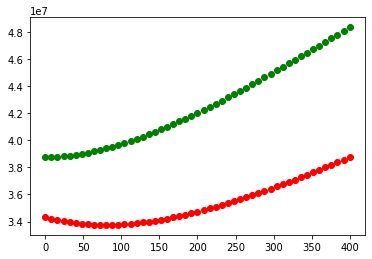

In [33]:
plt.scatter(lamd, train_error, color='g')
plt.scatter(lamd, test_error, color='r')
#plt.scatter(x_axis, np.sqrt(var), color='b')